# Aufgabe 06 - Tic Tac Toe

In [ ]:
import pprint
# Install dependencies
!pip install networkx pygraphviz matplotlib

In [4]:
import os

import networkx as nx
from networkx import DiGraph
import matplotlib.pyplot as plt
from IPython.display import Image
from networkx.drawing.nx_agraph import to_agraph
from random import choice

# Ensure the assets directory exists
os.makedirs('assets', exist_ok=True)

prefix = "aufgabe_06"

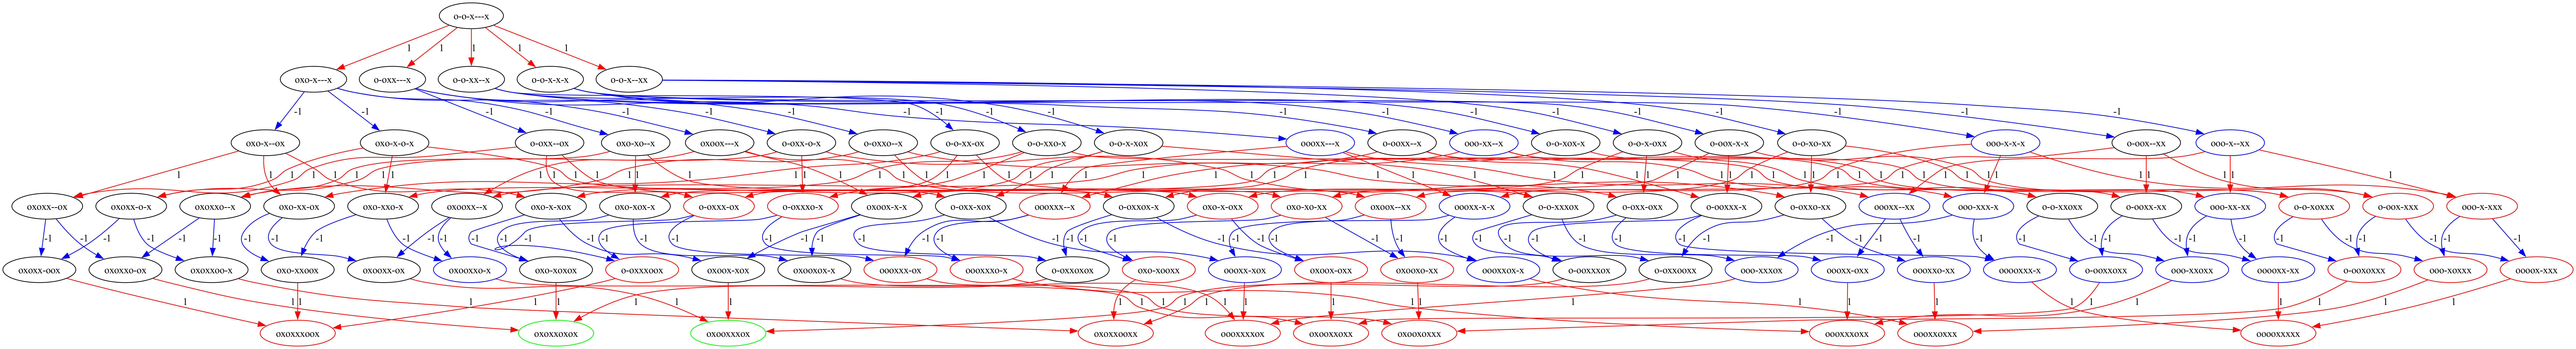

In [21]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph

def next_player(state):
    x_count = state.count('x')
    o_count = state.count('o')
    return 'x' if x_count == o_count else 'o'

def generate_next_states(state):
    player = next_player(state)
    next_states = []
    for i in range(len(state)):
        if state[i] == '-':
            new_state = state[:i] + player + state[i+1:]
            next_states.append(new_state)
    return next_states

def check_winner(state, player):
    win_positions = [
        [0, 1, 2], [3, 4, 5], [6, 7, 8],  # rows
        [0, 3, 6], [1, 4, 7], [2, 5, 8],  # columns
        [0, 4, 8], [2, 4, 6]              # diagonals
    ]
    for positions in win_positions:
        if all(state[i] == player for i in positions):
            return True
    return False

def get_game_outcome(state):
    if check_winner(state, 'x'):
        return 'x'
    elif check_winner(state, 'o'):
        return 'o'
    elif '-' not in state:
        return 'draw'
    else:
        return 'ongoing'

def build_tic_tac_toe_graph(current_state):
    G = nx.DiGraph()
    G.add_node(current_state)
    G.nodes[current_state]['outcome'] = get_game_outcome(current_state)
    queue = [current_state]

    while queue:
        state = queue.pop(0)
        next_states = generate_next_states(state)
        for next_state in next_states:
            if next_state not in G:
                queue.append(next_state)
                G.add_node(next_state)
                G.nodes[next_state]['outcome'] = get_game_outcome(next_state)
            player = next_player(state)
            weight = 1 if player == 'x' else -1
            G.add_edge(state, next_state, weight=weight, color='red' if player == 'x' else 'blue')

    return G

def visualize_graph_with_pygraphviz(G, filename='tic_tac_toe_graph.png', image_size=(30, 30), dpi=300):
    A = to_agraph(G)

    for node in G.nodes:
        outcome = G.nodes[node]['outcome']
        if outcome == 'x':
            A.get_node(node).attr['color'] = 'red'
        elif outcome == 'o':
            A.get_node(node).attr['color'] = 'blue'
        elif outcome == 'draw':
            A.get_node(node).attr['color'] = 'green'
        else:
            A.get_node(node).attr['color'] = 'black'

    for edge in G.edges(data=True):
        A.get_edge(edge[0], edge[1]).attr['color'] = edge[2]['color']
        A.get_edge(edge[0], edge[1]).attr['label'] = str(edge[2]['weight'])

    A.graph_attr.update(size="45,45!")
    A.graph_attr.update(dpi="300")
    A.layout(prog='dot')
    A.draw(filename)


# Example usage:
initial_state = "o-o-x---x"
G = build_tic_tac_toe_graph(initial_state)
filename = f'assets/{prefix}_tictactoe.png'
visualize_graph_with_pygraphviz(G, filename)
display(Image(filename))

In [26]:
print("Ordnung: ", len(G.nodes))
print("Größe: ", len(G.edges))

print("Endzustände: ", len(list(filter(lambda n: any(G.nodes[n]['outcome'] == p for p in ['x', 'o', 'draw']), G.nodes))))
print("x wins: ", len(list(filter(lambda n: G.nodes[n]['outcome'] == 'x', G.nodes))))
print("o wins: ", len(list(filter(lambda n: G.nodes[n]['outcome'] == 'o', G.nodes))))
print("draws: ", len(list(filter(lambda n: G.nodes[n]['outcome'] == 'draw', G.nodes))))


Ordnung:  96
Größe:  175
Endzustände:  46
x wins:  26
o wins:  18
draws:  2


In [27]:
# Perform topological sort
topological_order = list(nx.topological_sort(G))
# Initialize distances with -infinity
distances = {node: float('-inf') for node in topological_order}
# Initialize the path for the longest path
longest_path = []
# The distance to the start node is 0
start_node = topological_order[0]
distances[start_node] = 0
# Track the predecessor of each node
predecessors = {node: None for node in topological_order}

# Process nodes in topological order
for node in topological_order:
    for successor in G.successors(node):
        if distances[successor] < distances[node] + 1:
            distances[successor] = distances[node] + 1
            predecessors[successor] = node

# Find the node with the maximum distance
max_distance_node = max(distances, key=distances.get)
max_distance = distances[max_distance_node]

# Reconstruct the longest path
current_node = max_distance_node
while current_node is not None:
    longest_path.insert(0, current_node)
    current_node = predecessors[current_node]

print("longest path", longest_path)
print("maximum distance", max_distance)

longest path ['o-o-x---x', 'oxo-x---x', 'oxo-x-o-x', 'oxoxx-o-x', 'oxoxx-oox', 'oxoxxxoox']
maximum distance 5
